In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
from scipy import stats
from scipy.stats import weibull_min

In [64]:
kiosks_df = pd.read_csv('../../data/processed/Kiosk_with_LatLong.csv')

# Reset the index of the DataFrame
kiosks_df.reset_index(drop=True, inplace=True)

display(kiosks_df)

,kiosk_id,kiosk_name,kiosk_status,address,council_district,modified_date,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,city_asset_num,property_type,number_of_docks,power_type,footprint_length_feet,footprint_width_feet,notes,alt_name,latitude,longitude
0,2707,Rainey St @ Cummings,active,1 Rainey St,9,2022-03-04T10:38:00.000,2856,9,16597.0,parkland,17.0,solar,50.0,5.0,parkland at ROW/easement,NaN,30.255906,-97.739949
1,3838,Nueces & 26th,active,600 W. 26th St.,9,2021-01-04T00:00:00.000,2860,9,16744.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,NaN,30.290680,-97.742920
2,4051,10th & Red River,active,699 East 10th Street,1,2021-01-04T00:00:00.000,2856,1,32686.0,paid_parking,13.0,solar,40.0,5.0,NaN,NaN,30.270240,-97.735780
3,4061,Lakeshore @ Austin Hostel,active,2200 S Lakeshore Blvd,3,2021-01-04T00:00:00.000,3256,3,32692.0,nonmetered_parking,15.0,solar,45.0,5.0,NaN,NaN,30.244720,-97.723360
4,2494,2nd & Congress,active,151 E. 2nd St,9,2021-01-04T00:00:00.000,2856,9,16733.0,paid_parking,15.0,solar,45.0,5.0,NaN,NaN,30.264080,-97.743550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,4059,Nash Hernandez @ RBJ South,active,1316 Festival Beach Rd,3,2021-01-04T00:00:00.000,2857,3,32693.0,nonmetered_parking,13.0,solar,40.0,5.0,NaN,NaN,30.252000,-97.734600
70,4060,Red River/Cesar Chavez @ The Fairmont,active,101 Red River St.,9,2021-01-04T00:00:00.000,2856,9,32691.0,sidewalk,13.0,solar,40.0,5.0,NaN,NaN,30.262140,-97.738700
71,4062,Lakeshore & Pleasant Valley,active,2525 South Lakeshore Boulevard,3,2021-01-04T00:00:00.000,3256,3,32711.0,nonmetered_parking,18.0,solar,55.0,5.0,NaN,NaN,30.242580,-97.717260
72,4699,East 5th/Shady @ Eastside Bus Plaza,active,5104 East 5th. Street,3,2021-07-27T08:25:00.000,2857,3,32522.0,sidewalk,10.0,solar,15.0,10.0,NaN,NaN,30.252120,-97.698070


Distance DataFrame:


,Start_Kiosk_ID,End_Kiosk_ID,Start_Lat,Start_Long,End_Lat,End_Long,Distance
0,3390,3619,30.26754,-97.74154,30.26822,-97.74285,0.146782
1,3390,2495,30.26754,-97.74154,30.26634,-97.74378,0.253146
2,3390,2565,30.26754,-97.74154,30.26735,-97.73933,0.213291
3,3390,2496,30.26754,-97.74154,30.26980,-97.74186,0.253173
4,3390,2562,30.26754,-97.74154,30.26912,-97.73986,0.238531
...,...,...,...,...,...,...,...
5397,3791,4061,30.29439,-97.78375,30.24472,-97.72336,8.008678
5398,3791,3790,30.29439,-97.78375,30.27807,-97.77272,2.101143
5399,3791,2823,30.29439,-97.78375,30.25630,-97.71007,8.246248
5400,3791,4062,30.29439,-97.78375,30.24258,-97.71726,8.600176


Minimum latitude: 30.24258
Maximum latitude: 30.29439
Minimum longitude: -97.78375
Maximum longitude: -97.69807
Minimum distance: 0.14678184557924742 km
Maximum distance: 9.475834037654108 km
Center Lat: 30.267487662162164
Center Long: -97.74193387837836


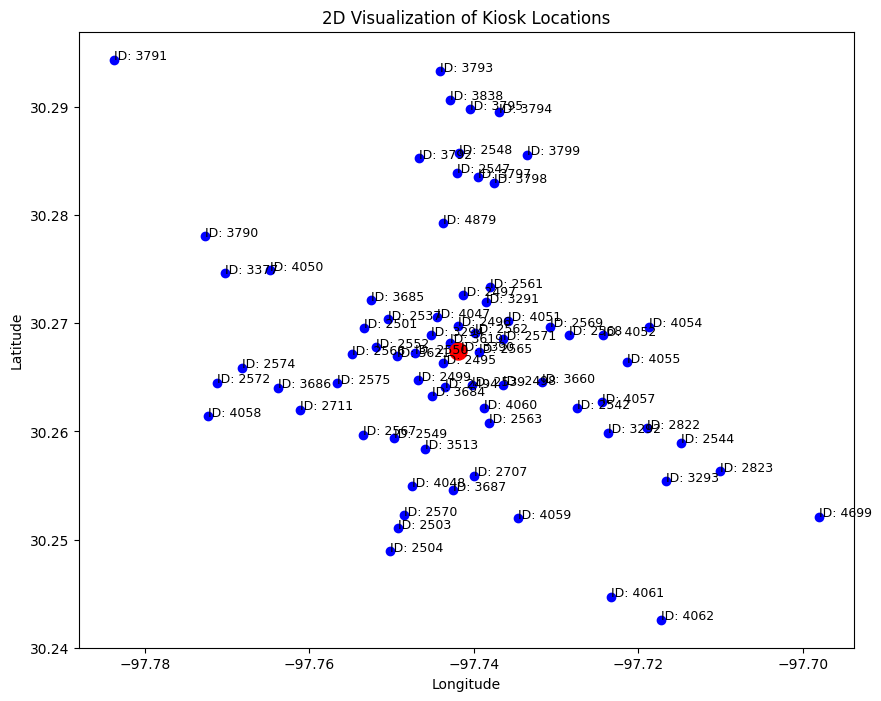

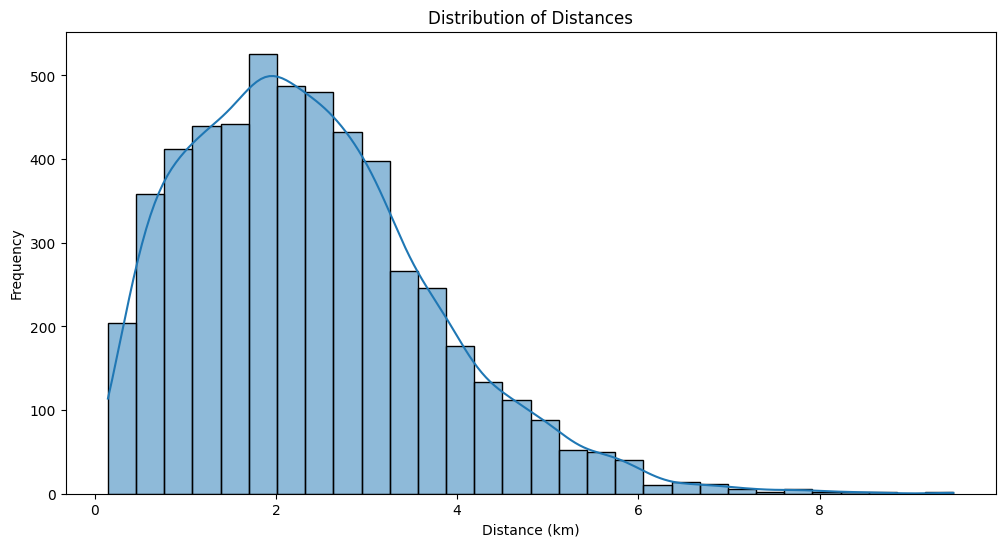

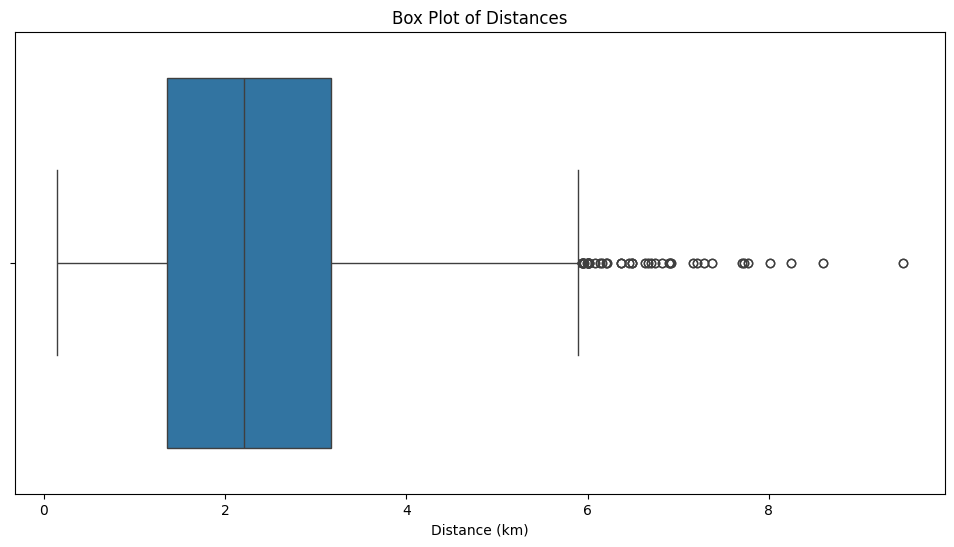

In [67]:
# Haversine function to calculate distance
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r


# Calculating center coordinates (average latitude and longitude)
center_lat = kiosks_df['latitude'].mean()
center_long = kiosks_df['longitude'].mean()

# Calculating distance of each Start_Kiosk_ID from the center
kiosks_df['Distance_From_Center'] = kiosks_df.apply(
    lambda row: haversine(center_long, center_lat, row['longitude'], row['latitude']), axis=1)

# Sorting kiosks_df based on Distance_From_Center
kiosks_df = kiosks_df.sort_values(by='Distance_From_Center')

# Preparing DataFrame for the result
result = []
for i in range(len(kiosks_df)):
    for j in range(len(kiosks_df)):
        if i != j: # Avoid calculating distance from a point to itself
            start_id = kiosks_df.iloc[i]['kiosk_id']
            end_id = kiosks_df.iloc[j]['kiosk_id']
            start_lat = kiosks_df.iloc[i]['latitude']
            start_lon = kiosks_df.iloc[i]['longitude']
            end_lat = kiosks_df.iloc[j]['latitude']
            end_lon = kiosks_df.iloc[j]['longitude']
            distance = haversine(start_lon, start_lat, end_lon, end_lat)
            result.append([start_id, end_id, start_lat, start_lon, end_lat, end_lon, distance])

# Converting result into DataFrame
columns = ["Start_Kiosk_ID", "End_Kiosk_ID", "Start_Lat", "Start_Long", "End_Lat", "End_Long", "Distance"]
distance_df = pd.DataFrame(result, columns=columns)

# Displaying the DataFrame
print("Distance DataFrame:")
display(distance_df)

# Minimum and maximum latitude
min_lat = distance_df[['Start_Lat', 'End_Lat']].min().min()
max_lat = distance_df[['Start_Lat', 'End_Lat']].max().max()

# Minimum and maximum longitude
min_long = distance_df[['Start_Long', 'End_Long']].min().min()
max_long = distance_df[['Start_Long', 'End_Long']].max().max()

# Minimum and maximum distance
min_distance = distance_df['Distance'].min()
max_distance = distance_df['Distance'].max()

# Print the results
print("Minimum latitude:", min_lat)
print("Maximum latitude:", max_lat)
print("Minimum longitude:", min_long)
print("Maximum longitude:", max_long)
print("Minimum distance:", min_distance, "km")
print("Maximum distance:", max_distance, "km")
print("Center Lat:", center_lat)
print("Center Long:", center_long)

# Visualizing in 2D with an interactive plot
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of the latitude and longitude with Kiosk IDs
for index, row in kiosks_df.iterrows():
    ax.scatter(row['longitude'], row['latitude'], c='blue', marker='o')
    ax.text(row['longitude'], row['latitude'], f'ID: {row["kiosk_id"]}', fontsize=9)

# Mark the center point
ax.scatter(center_long, center_lat, c='red', marker='o', s=150)

# Adding labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2D Visualization of Kiosk Locations')

plt.show()

# Histogram for distribution of distances
plt.figure(figsize=(12, 6))
sns.histplot(distance_df['Distance'], kde=True, bins=30)
plt.title('Distribution of Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

# Box plot for understanding the spread and identifying outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=distance_df['Distance'])
plt.title('Box Plot of Distances')
plt.xlabel('Distance (km)')
plt.show()

In [68]:
#Testing distributions

data = distance_df['Distance']

# List of distributions to test
distributions = [stats.norm, stats.expon, stats.lognorm, stats.weibull_min, stats.weibull_max]

# Store the results
results = []

# Fit the data to each distribution and calculate AIC and BIC
for distribution in distributions:
    # Fit distribution to data
    params = distribution.fit(data)

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate the log likelihood
    log_likelihood = np.sum(distribution.logpdf(data, *arg, loc=loc, scale=scale))

    # Calculate AIC and BIC
    aic = -2*log_likelihood + 2*len(params)
    bic = -2*log_likelihood + len(params)*np.log(len(data))

    # Append results
    results.append((distribution.name, aic, bic))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Distribution', 'AIC', 'BIC'])

# Sort by AIC and BIC
sorted_results_aic = results_df.sort_values(by='AIC')
sorted_results_bic = results_df.sort_values(by='BIC')

# Print the best fit based on AIC and BIC
print("Best fit based on AIC:")
print(sorted_results_aic.head(1))
print("\nBest fit based on BIC:")
print(sorted_results_bic.head(1))

Best fit based on AIC:
  Distribution           AIC          BIC
3  weibull_min  17678.362417  17698.14599

Best fit based on BIC:
  Distribution           AIC          BIC
3  weibull_min  17678.362417  17698.14599


In [69]:
#Because the data fits a weibull distribution we can develop logical cutoffs using the data

# Extracting distance data
data = distance_df['Distance']

# Weibull distribution fitting
params = stats.weibull_min.fit(data)
shape_param, loc, scale_param = params

shape_param, scale_param

# Function to calculate cutoffs
def weibull_cutoffs(shape, scale, lower_percentile, upper_percentile):
    lower_cutoff = weibull_min.ppf(lower_percentile, shape, scale=scale)
    upper_cutoff = weibull_min.ppf(upper_percentile, shape, scale=scale)
    return lower_cutoff, upper_cutoff

# Calculate cutoffs for 33rd and 66th percentiles
lower_cutoff, upper_cutoff = weibull_cutoffs(shape_param, scale_param, 0.159, 0.841)

print(f"Short/Medium Cutoff: {lower_cutoff} km")
print(f"Medium/Long Cutoff: {upper_cutoff} km")

# Calculate cutoffs for -1 SD and +1 SD equivalent in Weibull distribution
minus_one_sd_cutoff, plus_one_sd_cutoff = weibull_cutoffs(shape_param, scale_param, 0.159, 0.841)

print(f"-1 SD Equivalent Cutoff: {minus_one_sd_cutoff} km")
print(f"+1 SD Equivalent Cutoff: {plus_one_sd_cutoff} km")

Short/Medium Cutoff: 0.9069817439015526 km
Medium/Long Cutoff: 3.61510003190158 km
-1 SD Equivalent Cutoff: 0.9069817439015526 km
+1 SD Equivalent Cutoff: 3.61510003190158 km


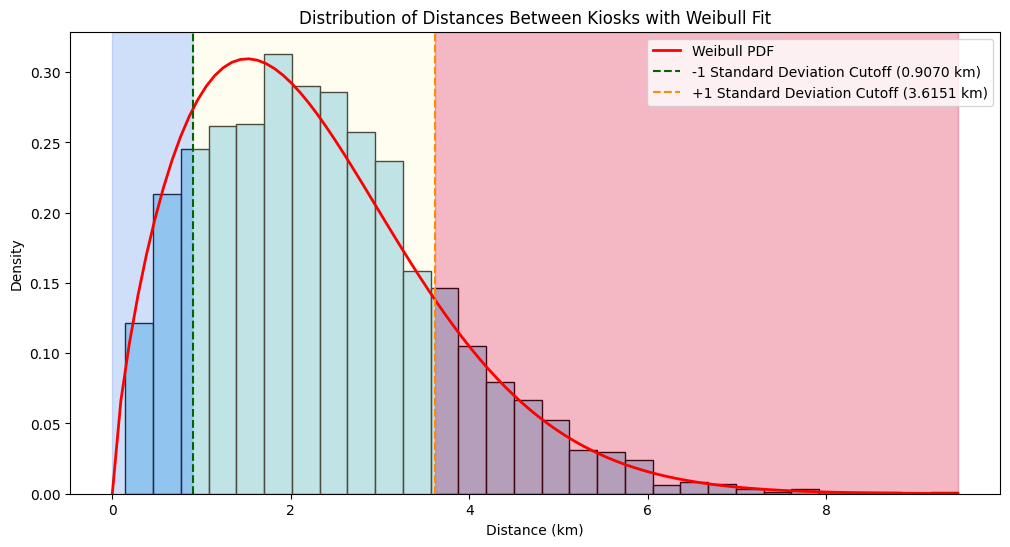

In [84]:
#Histogram for distribution of distances with actual cutoff values in the labels
plt.figure(figsize=(12, 6))
sns.histplot(distance_df['Distance'], kde=False, bins=30, stat='density', color='skyblue')

# Plot Weibull PDF for comparison
x = np.linspace(0, distance_df['Distance'].max(), 100)
y = weibull_min.pdf(x, shape_param, scale=scale_param)
plt.plot(x, y, 'r-', lw=2, label='Weibull PDF')

# Add cutoff lines with labels using variables
plt.axvline(minus_one_sd_cutoff, color='darkgreen', linestyle='--', 
            label=f'-1 Standard Deviation Cutoff ({minus_one_sd_cutoff:.4f} km)')
plt.axvline(plus_one_sd_cutoff, color='darkorange', linestyle='--', 
            label=f'+1 Standard Deviation Cutoff ({plus_one_sd_cutoff:.4f} km)')

# Adding colored regions with some transparency
plt.axvspan(0, minus_one_sd_cutoff, color='#6495ED', alpha=0.3)  # Left of minus_one_sd_cutoff
plt.axvspan(minus_one_sd_cutoff, plus_one_sd_cutoff, color='#FFFACD', alpha=0.3)  # Between cutoffs
plt.axvspan(plus_one_sd_cutoff, distance_df['Distance'].max(), color='#DC143C', alpha=0.3)  # Right of plus_one_sd_cutoff

plt.title('Distribution of Distances Between Kiosks with Weibull Fit')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.legend()

plt.show()

In [71]:
# Saving the DataFrame as a JSON file
distance_df.to_json('../../dist/data/processed/kiosk_vis_paths.json', orient='records')